# Preliminary Data Science - Linguistic Perspective

Walaupun saya tulis demikian judulnya, bukan berarti saya orang linguistik, matematika atau statistik.

Masih ingat beberapa waktu yang lalu ada berita yang cukup menarik perhatian khalayak, kalau Facebook baru saja menutup salah satu unit bisnisnya karena mesin yang mereka kembangkan mampu membuat bahasanya sendiri untuk berkomunikasi satu dengan yang lainnya ?

Terlepas dari apa yang terjadi, Bahasa bagi saya menjadi fenomena yang unik dan sangat menarik untuk diperhatikan. Bagaimana sinyal yang dikeluarkan bisa menjadi alat tukar informasi antar mahluk hidup yang ada, tentu saja sinyal yang dikeluarkan  akan dapat memiliki ragam yang luar biasa banyak.

Pada bagian pertama ini, saya akan coba untuk mendeskripsikan dasar-dasar, seperti apasih data science itu, tentu dari sisi yang pernah saya selami sebagai NLP Engineer.

Kira-kira seperti dibawah urutan pembelajaran kita:
1. Variabel
* Data
 * Preparing your dataset
 * Transformation
* Language in Statistics
 * Data Visualization
 * Learn Relationship
* Language in Math
 * Vector
 * Matrix

In [1]:
import numpy as np

import math
import re
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import itertools

from scipy import stats

pd.set_option('display.max_row', 15)
pd.set_option('display.max_columns', 15)

## Variabel
Beberapa definisi mengenai variable, yang saya dapatkan dari beberapa website:

* A variable is any characteristics, number, or quantity that can be measured or counted. A variable may also be called a data item. Age, sex, business income and expenses, country of birth, capital expenditure, class grades, eye colour and vehicle type are examples of variables. It is called a variable because the value may vary between data units in a population, and may change in value over time. 

* A characteristic, number, or quantity that increases or decreases over time, or takes different values in different situations.

* In programming, a variable is a value that can change, depending on conditions or on information passed to the program.

* A variable is any entity that can take on different values.

* Variables in natural language are constructions that are typed and quantified as they are used. A consequence of this is that variables in natural language may be freely reused in dialog. This leads to the use of pronouns and discourse phenomena such as ellipsis involving reuse of entire subformulas. We present an augmentation to the representation of variables so that variables are not atomic terms. These "structured" variables are typed and quantified as they are defined and used. This leads to an extended, more "natural" logical language whose use and representations are consistent with the use of variables in natural language. Structured variables simplify the tasks associated with natural language processing and generation, by localizing noun phrase processing.

* * *

## Data
Menurut saya, data itu berupa segala sesuatu yang dapat diamati secara kasat mata, bisa berupa: alphabet, numeric, symbol, dan banyak lainnya. Data seperti apa adanya, tidak terstruktur dan kotor. Dengan teknik pemrosesan yang tepat data bisa kita rubah menjadi sesuatu yang lebih memiliki makna, atau bisa disebut informasi.

#### Preparing your dataset
Ketika kita memiliki sejumlah data, kemudian kita kumpulkan dan kelompokkan menjadi satu, baik berdasar kondisi atau karakteristik yang diinginkan, maka kumpulan data tersebut kita sebut **Dataset**.

Kali ini kita akan menggunakan Dataset sample dengan ukuran kecil, yang saya ambil dari situs berita ternama Kumparan.

In [2]:
document_0 = """Ini adalah sesi yang menyenangkan untuk Cal Crutchlow, tapi tidak begitu untuk Marc Marquez. Pada sesi latihan bebas kedua MotoGP Inggris, Jumat (25/8/2017) malam WIB, Crutchlow, yang merupakan pebalap tuan rumah, menjadi pebalap tercepat setelah menorehkan catatan waktu 2:00,897 detik. Sementara itu, Marquez harus terjatuh dua kali pada sesi kali ini. Namun, Marquez tetap bisa melanjutkan sesi dan akhirnya menempati posisi kelima setelah menorehkan catatan waktu 2:01,611 detik. Sesi kedua ini berjalan menarik di awal. Maverick Vinales sempat memimpin lebih dulu, sebelum akhirnya catatan waktunya dilampaui oleh Crutchlow. Catatan waktu Crutchlow kemudian dikalahkan oleh Marquez, dan Crutchlow sekali lagi memimpin setelah melampaui catatan waktu Marquez. Posisi kedua pada sesi kedua ini ditempati oleh Valentino Rossi. Rider asal Italia ini menorehkan catatan waktu 2:01,138 detik atau berselisih 0,241 detik dari catatan waktu Crutchlow. Sementara itu, Vinales harus puas berada di posisi ketiga —setelah sebelumnya menjadi pebalap tercepat di sesi pertama. Vinales menorehkan catatan waktu 2:01,168 detik. Sesi ini sendiri berlangsung dalam keadaan kering dengan cuaca cerah memayungi Sirkuit Silverstone. Rangkaian seri MotoGP Inggris akan berlanjut ke sesi latihan bebas ketiga dan kualifikasi pada Sabtu (26/8)."""
document_1 = """Kementerian Kelautan dan Perikanan (KKP) kini tengah membantu nelayan dalam mendapatkan layanan perbankan seperti akses kredit para nelayan. Usaha ini dilakukan sebagai upaya untuk membantu para nelayan atas adanya kebijakan larangan penggunaan cantrang oleh nelayan. Jumat (25/8) sore, KKP dan Bank Negara Indonesia (BNI) menandatangani MoU kesepakatan kerja sama tentang penyediaan dan penggunaan layanan perbankan bagi nelayan. Kerja sama ini memberikan berbagai kemudahan kepada KKP dalam pengelolaan keuangan yang digunakan untuk menjalankan kebijakan untuk nelayan. Dalam menciptakan efisiensi dan efektivitas kinerja keuangan KKP, Menteri Kelautan dan Perikanan, Susi Pudjiastuti menunjuk BNI sebagai bank yang akan mengelola dana Anggaran Pendapatan dan Belanja Negara (APBN) KKP. "BNI juga sudah berkerja sama dengan KKP dalam pengelolaan uang APBN," ujar Susi, di Gedung Mina Bahari IV, Gambir, Jakarta Pusat, Jumat (25/8). Susi berharap, setelah membantu mengelola dana APBN, BNI juga dapat mengelola dana kredit Badan Layanan Usaha (BLU) KKP untuk nelayan. Sehingga total dana kredit BLU sebesar Rp 500 miliar dapat terserap dengan lebih baik "Sekarang kita punya BLU. Saya berharap kredit BLU kita bisa terserap lebih cepat dan lebih profesional dan penerimanya jauh lebih baik dengan memanfaatkan kapasitas yang ada di perbankan," imbuh Susi. Lantas Susi berharap agar BNI menyalurkan kredit BLU KKP tidak jauh berbeda dengan bunga maksimal 6 persen. Hal itu agar penyaluran kredit BLU KKP besar manfaatnya bagi para nelayan. "Kredit BLU kita maksimum 6 persen kalau bisa 4-5 persen. Tapi BNI kalau bisa jangan terlalu beda, kalau beda ya hanya 1 persen saja dari kredit BLU KKP. Kalau tidak bagaimana bantu masyarakat kecil," pungkas Susi. Sebagai informasi, oleh KKP, BNI juga ditunjuk untuk menyalurkan kredit kepada mitra-mitra binaan KKP di industri kelautan dan perikanan, hingga memberikan edukasi mengenai layanan perbankan kepada nelayan."""
document_2 = """Setelah Japanese Cheesecake sempat menggebrak dunia kuliner Indonesia beberapa bulan terakhir, kini nampaknya dunia kuliner segera diramaikan dengan kehadiran kue yang mendapat pengaruh cukup kental dari industri kuliner Jepang, yaitu pillow cake (kue bantal) yang menyerupai Japanese Sponge Cake yang lembut. Adalah Momoiro, pillow cake factory yang khusus menyajikan hidangan pillow cake dengan tekstur yang sangat fluffy nan menggoda. Pillow cake ini sebelumnya telah lebih dulu populer di negara Asia Timur seperti Korea, Jepang dan Taiwan. Rosita Ngadiman selaku owner PT. Mimosa Tarte Indonesia  mengatakan bahwa dirinya siap memperkenalkan kepada masyarakat mengenai pillow cake yang tak kalah enak dengan Japanese Cheesecake yang saat ini tengah booming. "Perusahaan kami sangat mencintai dunia bakery dan kami senang akhirnya kami bisa memperkenalkan Momorio pillow cake factory kepada pemburu kue di Jakarta," ungkap Rosita di gerai Momoiro, Kota Kasablanka, Jakarta Selatan, Rabu (23/8). "Ini adalah pillow cake spesial yang lahir dari proses product development yang ekstensif. Kami ingin para pelanggan kami bisa merasakan pengalaman dessert yang unik ketika mereka menikmati Momoiro pillow cake," tambahnya. Tak main-main, dalam membuat adonan kue pillow cake ini, Rosita berujar jika dirinya melakukan survei terlebih dahulu dengan terjun langsung ke beberapa negara dalam mencari talenta terbaik dalam merealisasikan produk pillow cake buatannya. Momoiro ditawarkan dalam beberapa varian rasa, mulai dari Momoiro Original yang berwarna merah muda menggemaskan yang diisi filling custard yang manis, Choko B yakni pillow cake dengan rasa cokelat pisang yang kaya, Pumpkin yang diisi dengan saus labu yang nikmat, Pandan yang diisi dengan filling srikaya, Tori yang dibuat dengan rasa gurih abon ayam dan rumput laut serta Chizu yang khusus dipersembahkan bagi para pecinta keju karena terbuat dari dua jenis keju yaitu red cheddar yang dijadikan sebagi filling dan parmesan cheese yang ditaburi di atas kue. "Kita ngga menggunakan bahan pengawey seperti baking powder untuk mengembangkan kue tapi kita hanya menggunakan telur yang fresh untuk menciptakan tekstur kue yang fluffy," papar Rosita. "Pemanggangan kue juga dilakukan selama 1,5 jam lamanya khusus untuk mendapatkan tekstur kue yang sesuai dengan standar pillow cake pada umumnya," lanjutnya. Demi menjaga kualitas kue, Momoiro dibuat oleh chef pastry yang didatangkan langsung dari Taiwan yang juga menjadi negara yang sudah memperkenalkan pillow cake lebih dulu. Momoiro pillow cake akan terus menghadirkan varian lain secara bergantian setiap harinya. Kedepannya, Rosita berujar jika Momoiro akan segera membuka cabang terbarunya di beberapa wilayah yang tersebar di seluruh Indonesia. Kamu yang tertarik mencobanya silakan datang langsung ke Kota Kasablanka. Untuk satu kotak cake berukuran 14 x 20 cm dibanderol seharga Rp 55 ribu. Selamat mencoba!"""
document_3 = """Jika diminta menyebutkan efek buruk sinar matahari terhadap kulit, kamu semua pasti dengan lancar menuturkan jawabannya. Seperti penuaan dini, garis halus, kerutan, flek hitam, warna kulit menggelap, dan sebagainya. Namun sadarkah kamu bahwa kulit yang dibiarkan tanpa perlindungan dalam waktu yang lama bisa menimbulkan efek yang jauh lebih buruk? Paparan sinar UVA dan UVB dalam jangka panjang bisa menyebabkan kanker kulit. Di kalangan orang Asia, khususnya Indonesia, kanker kulit mungkin masih asing di telinga. "Kalau kita kulitnya gelap, kita punya natural protection yang lebih tinggi. Makanya kenapa kalau saya bilang soal kanker kulit, orang Indonesia itu tidak akan aware, karena kejadiannya tidak banyak," tutur dr. Srie Prihianti Gondokaryono, SpKk, PhD, FINSDV, FAADV, saat ditemui kumparan (kumparan.com) dalam acara NIVEA #ILoveMyBody, di Mall Taman Anggrek, Jakarta Barat, Jumat (25/8). Meski demikian, penyakit yang satu ini harus tetap kamu waspadai, karena presentasenya semakin meningkat dari waktu ke waktu. Di Indonesia, kasus kanker kulit tidaklah setinggi Australia. "Tinggi banget, karena orang Australia kan pendatang, orang Eropa yang tinggal di daerah Tropis, sehingga angka kanker kulit tertinggi dunia itu ada di Australia," ungkapnya. Jadi, kamu sebagai orang Indonesia bisa sedikit bernapas lega karena dibekali dengan kulit sawo matang alias cokelat. Namun jangan melulu hanya menyalahkan sinar matahari dan kelalaian menggunakan sunscreen sebagai penyebab kanker kulit, karena penyakit ini dipicu oleh banyak faktor. "Jadi artinya (tidak menggunakan) sunscreen itu hanya salah satu faktor saja yang memicu," sambung Prihianti. "Kanker itu biasanya ada gen-nya, jadi orang itu ada kecenderungan untuk punya penyakit tertentu, misalnya di keluarganya ada riwayat atau tidak," jelasnya. "Kedua, bagaimana pola makan dan segala macam, kan ada karsinogenik. Yang ketiga, perawatan perlindungan kulitnya," kata dia. Lantas, bagaimana cara mendeteksi kanker kulit sejak dini? Penyakit ini biasanya menunjukkan sejumlah gejala yang cukup mudah dikenali. Seperti munculnya tahi lalat yang abnormal pada permukaan kulit.  "Awalnya seperti tahi lalat. Tapi kemudian dia berdarah, cepat membesar, dan gatal. Itu harus kita waspadai," peringat Prihantini. Kanker kulit bukanlah penyakit mematikan yang mampu membahayakan nyawa. Namun yang pasti, penyakit ini mampu menurunkan kualitas hidup penderitanya. Jadi, sayangi dan cintai kulit kamu selalu, ya!"""
document_4 = """Dari sekian banyak hal yang mengganggu di internet, salah satunya adalah membuka situs yang secara otomatis memutar video bersuara. Untungnya, seperti yang diberitakan Android Police , Google berusaha mencari solusi untuk masalah ini di Chrome. Kelak kita akan bisa memblok suara berdasarkan domain tertentu yang diakses lewat balon info laman. Berdasarkan keterangan Francois Beaufort dari Google, tim Chrome masih bereksperimen dengan fitur ini. Pada versi awal, saklar suara ini terletak di popup info laman, yang bisa diakses dengan mengklik bagian kiri jauh dari kotak alamat situs. Bentuknya bisa berupa ikon info atau label “Secure” untuk situs-situs yang menggunakan teknologi HTTPS. Telah ada banyak saklar untuk fitur seperti Flash, JavaScript, notifikasi dan lain-lain. Tak lama lagi, saklar untuk suara akan ditambahkan. Situs-situs yang suaranya dimatikan akan tetap seperti itu hingga anda memilih untuk menyalakannya kembali. Fitur ini akan sangat bermanfaat untuk laman-laman yang rutin dikunjungi dan seringkali memutarkan video. Untuk sekarang fitur tersebut dapat dilihat di versi Canary terbaru dari Chrome untuk komputer."""
document_5 = """Kasus penunggakan pajak yang sempat menyorot beberapa nama artis Indonesia beberapa waktu belakangan ini, tengah ramai dibicarakan. Petugas Badan Pajak dan Retribusi DKI Jakarta (BPRD) pun sempat melakukan sidak door-to-door ke kediaman para artis yang masuk dalam list, salah satunya Raffi Ahmad. Mendengar kehebohan tersebut, aktor Tanta Ginting pun ikut angkat bicara. Ia mengaku sama sekali tak mengerti mengapa harus nama-nama artis Indonesia yang masuk dalam daftar penunggak pajak, sedangkan di luar sana banyak juga masyarakat yang memiliki mobil mewah. "Gue enggak ngerti ya, maksudnya mereka nyari apa? Kenapa harus selebriti? Maksudnya yang lain kan juga banyak yang punya mobil mewah. Gue sih enggak menyalahkan Dirjen Pajaknya, tapi gue lebih menyorot medianya, kenapa yang diliput itu-itu saja? Atau mungkin supaya medianya dibaca?" ungkapnya saat ditemui di Grand Indonesia, Jakarta Pusat. Tanta pun tak heran jika akhirnya nama Raffi ikut terseret dalam kasus penunggakan pajak. "Karena kan kalau ngomongin pajak yang punya mobil mewah kan sebenarnya selebriti yang punya mobil mewah sedikit, makanya yang kelihatan Raffi lagi. Karena dia duitnya banyak, tiap hari ada (shooting), tiap jam ada (acara TV). Makanya menurut gue yang dipertanyakan medianya, jangan orang pajak. Karena orang pajak pasti akan mengecek semua untuk kewajiban orang yang harus bayar pajak. Tapi kenapa harus seleb?" lanjutnya. Namun, sebagai salah satu selebriti, Tanta mengaku tak punya keinginan untuk memiliki sebuah mobil mewah. Terlepas dari hobinya yang bukan 'anak mobil', Tanta juga merasa sia-sia bila memiliki mobil mewah, terutama keluaran Eropa dan dipakai di Jakarta. "Gue anaknya bukan anak mobil sih, lagian kalau di Jakarta kan macet ya. Mobil overheat mulu karena kan mobil Eropa diperuntukkan untuk cuaca dingin. Kalau di sini riweuh. Yang ada beli buat pajangan atau kalau ramai-ramai pawai. Kalau sehari-hari kayaknya enggak, karena banyak mobil teman gue yang terbakar gara-gara overheat," bebernya. Secara terang-terangan pria berusia 35 tahun ini mengaku memilih memakai uangnya untuk jalan-jalan ketimbang beli mobil mewah. "Gue orangnya lebih ke travel. Gue mungkin ke tempat travel misalnya, kalau gue punya duit gue akan ke tempat yang lebih mahal. Gue kalau ada duit segitu mendingan travel. Ke Raja Ampat aja mahal lho. Iya kan?" lanjutnya. Keinginannya untuk pergi ke Raja Ampat pun membuat bintang film 'Soekarno: Indonesia Merdeka' ini mulai giat menabung. Meski mahal, namun Tanta tahu ia akan mencapai kepuasan tersendiri saat menginjakkan kaki ke sana. "Masih nabung makanya. Kemarin sempat ke Labuan Bajo, ternyata lumayan mahal juga tapi puas. Ya gue gitu sih, duitnya lebih, dipakai buat jalan-jalan," katanya. Rencananya, Tanta akan menghabiskan waktu untuk travelling ke daerah lain dulu sebelum Raja Ampat. "Ambon belum, Pulau Kei belum. Masih banyak deh. Gue mau travel dulu kayak ke Rinjani dan Kalimutu. Gue habisin dulu, baru setelah itu Raja Ampat. Gue mau yang proses pelan-pelan gitu ke atas.  Pokoknya Raja Ampat yang terakhir karena orang-orang bilang keren banget. Jadi, menurut gue Raja Ampat kayak mobil Ferrari. Jadi gue enggak mau habis naik Ferrari, besok-besoknya naik mobil Honda lagi. Jadi, kayak drop banget," tutupnya seraya tertawa."""
document_6 = """Ketua Umum Pengurus Besar Nahdlatul Ulama (PBNU) Said Aqil Siradj memilih untuk bersikap netral terhadap dua kadernya yang akan maju dalam Pemilihan Gubernur Jawa Timur 2018. Kedua kader tersebut adalah Saifullah Yusuf atau Gus Ipul dan Khofifah Indar Parawansa. "Saya secara pribadi maupun struktural NU bersikap netral. Siapapun nanti yang menang di Pilkada Jatim 2018, itulah kader NU yang akan kami dukung," kata Said di Surabaya, Sabtu  (26/8), seperti dilansir Antara. Said menegaskan, secara struktural NU maupun atas nama pribadi, tidak akan mengklaim dukungan perseorangan untuk Khofifah atau Gus Ipul. Hal tersebut, kata Said, juga berlaku untuk struktur kepengurusan lembaga dan badan otonom NU. "Ansor harus netral, Banser harus netral. Yang tidak berpolitik harus netral," kata Said, menegaskan. Aqil juga mengimbau kepada seluruh masyarakat Jawa Timur, terutama para nahdliyin, untuk melaksanakan Pilkada dengan baik dan damai. Dia menyerahkan sepenuhnya pilihan politik kepada warga NU, terkait calon yang diinginkan untuk memimpin Jawa Timur lima tahun ke depan. "Karena siapapun Gubernur Jawa Timur yang terpilih nanti, yang menang tetap NU," ujarnya. Baik Gus Ipul atau Khofifah, keduanya masih memiliki tugas yang harus diselesaikan. Gus Ipul, kini masih menjabat sebagai Wakil Gubernur Jawa Timur, begitu pula dengan Khofifah dengan tugas-tugasnya sebagai Menteri Sosial. Yang pasti, jika keduanya telah memantapkan diri untuk maju di Pilgub Jatim, para nahdliyin akan dihadapkan dengan dua pilihan yang sulit. Gus Ipul dan Khofifah sudah memiliki sepak terjang politik --juga sama-sama aktif di kepengurusan NU. Bedanya, untuk sekarang ini, Gus Ipul sudah mengambil formulir pendaftaran bakal calon Gubernur Jawa Timur. Sedangkan, Khofifah masih enggan bicara soal peluang dan harapannya menjadi cagub Jatim lantaran masih menunggu restu dari Presiden Joko Widodo. Secara etika, Khofifah baru bisa resmi mendaftar setelah mendapat restu dari Presiden. "Etikanya kan seperti itu," ujar Ketua Muslimat NU tersebut usai mengunjungi Kompleks Istana Kepresidenan, Rabu (23/8). """

all_documents = [document_0, document_1, document_2, document_3, document_4, document_5, document_6]

In [3]:
import string
table = string.maketrans("","")
# Sebetulnya .strip sangat berguna, tapi menyebakan proses sedikit lebih lama saat proses tokenize, 
#   harus dicari cara lain
def wordTokenize(sent, remove_stopwords=False, tolower=False, \
                 remove_punct=False, strip=False, isnull_term=False):
    if remove_stopwords:
        return [x.strip().lower() for x in sent.split() if x.strip() if x.strip().lower() not in stopwords]
    else:
        if strip:
            return [x.strip() for x in sent.split() if x.strip()]
        else:
            if isnull_term:
                return [x for x in sent.split() if len(x.split()) > 0]
            else:
                return [x for x in sent.split()]

Karena tujuan akhir kita adalah untuk memodelkan bahasa kedalam sebuah matematikal atau statistical model, harus kita cari cara untuk merubah setiap kata pada dokumen menjadi angka yang bisa diproses sebuah rumus(baik math atau stats).

* * *

pada area linguistik, ada term yang dikenal sebagai Lexicon, ambil arti dari wikipedia, Lexicon adalah sebuah vocabulary(sekumpulan kata-kata yang dikuasai oleh seseorang, bersifat unique atau no-duplication).

In [4]:
# Because Vocabulary is no-duplicity-allowed, so we need to find a way to make it.

# Tokenization, atau memecah setiap element pada sample atau populasi kedalam unit-satuan(element-satuan).
def corpusTokenizer(corpora):
    return [wordTokenize(doc) for doc in corpora]

%timeit corpusTokenizer(all_documents)
tokenized_corpus = corpusTokenizer(all_documents)

The slowest run took 7.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 223 µs per loop


In [5]:
def buildLexicon(corpus):
    # term is a word or a lexemes
    return set([term for doc in tokenized_corpus for term in doc])

print "Using buildLexicon:"
%timeit buildLexicon(all_documents)

Using buildLexicon:
10000 loops, best of 3: 182 µs per loop


In [96]:
# Here are our Lexicon or Vocabulary
Lexicon = buildLexicon(all_documents)

#Dictionaries in python have no order dont use dictionary for getting index num
print "Len of Dictionary: %d"%len(Lexicon)

Len of Dictionary: 1178


#### Data Transformation

> Whenever you find your data does'nt make senses, transform it.

In [7]:
#np.random.normal will produce random sample from a normal gaussian distribution
dt1 = {'temperature':np.random.uniform(15,45,1000),
       'windspeed':np.random.uniform(40,100,1000),
       'humidity':np.random.uniform(0,0.9,1000)}

dtf = pd.DataFrame.from_dict(dt1, orient='columns')

# Applying log transformation across columns
ttransform='' # other is: exp, sqrpow
if ttransform=='log':
    print "Log transformation!"
    dtf = dtf.applymap(lambda x: math.log(x))
elif ttransform=='exp':
    print "Exponential transformation!"
    dtf = dtf.applymap(lambda x: math.exp(x))
elif ttransform=='sqrpow':
    print "Power transformation!"
    dtf = dtf.applymap(lambda x: math.pow(x,2))
else:
    print "No Transformation!"
    dtf

No Transformation!


This number will be rough and probably not correct, i just wanna give some idea about data transformation.

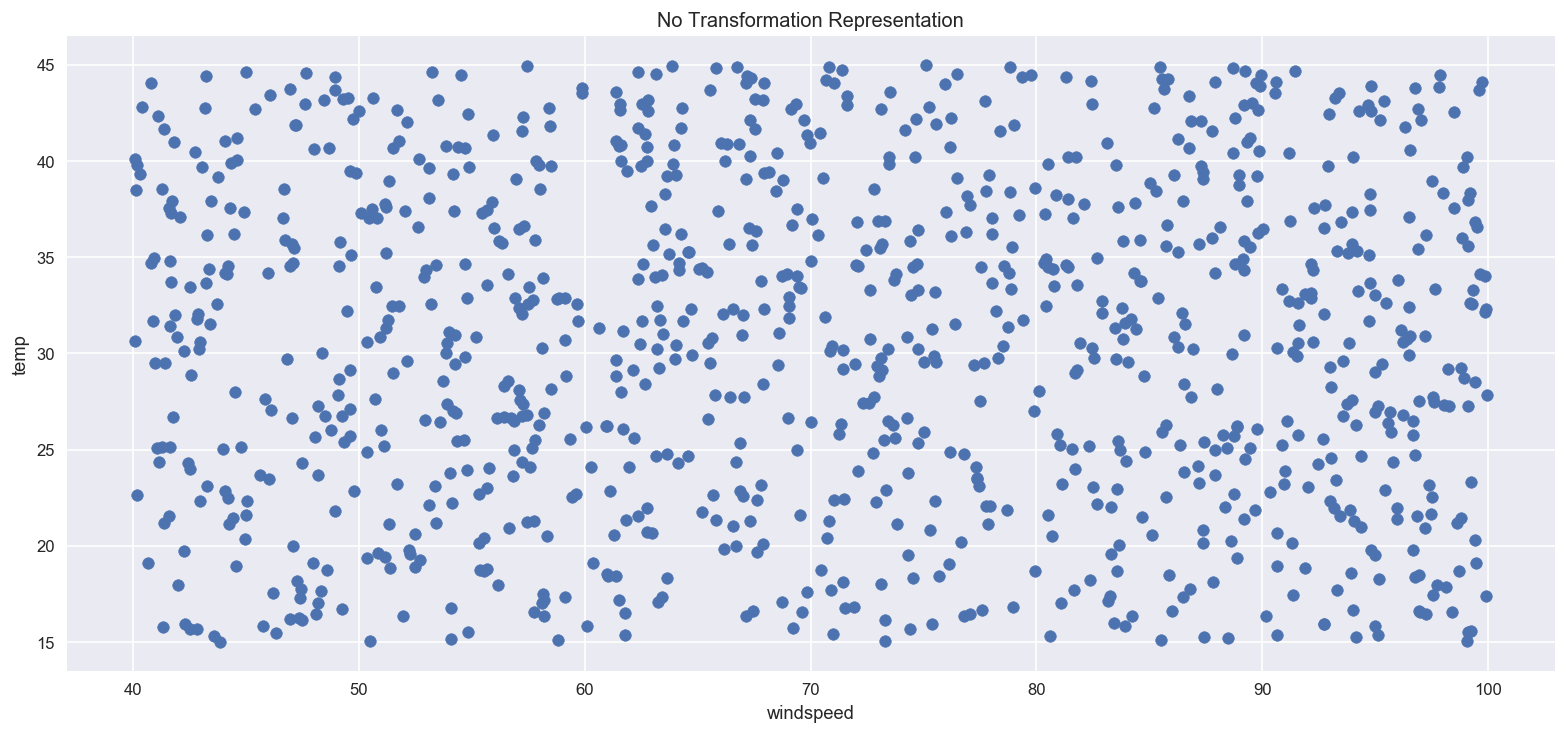

In [8]:
plt.figure(figsize=(16,7), dpi=120)
plt.scatter(dtf.windspeed.values, dtf.temperature.values)
plt.title('No Transformation Representation')
plt.xlabel('windspeed')
plt.ylabel('temp')
plt.show()

> data transformation sepertinya mengajari kita, bahwa dalam hidup kita tidak boleh melihat segala sesuatu dari satu sisi saja, banyak sudut yang harus juga dilihat sebelum kita mengambil kesimpulan.

In [9]:
class DtTransformation():
    def trLog(var):
        return math.log(var)
    def trExp(var):
        return math.exp(var)
    def trSqr(var):
        return math.pow(var, 2)

trExp
trSqr
trLog


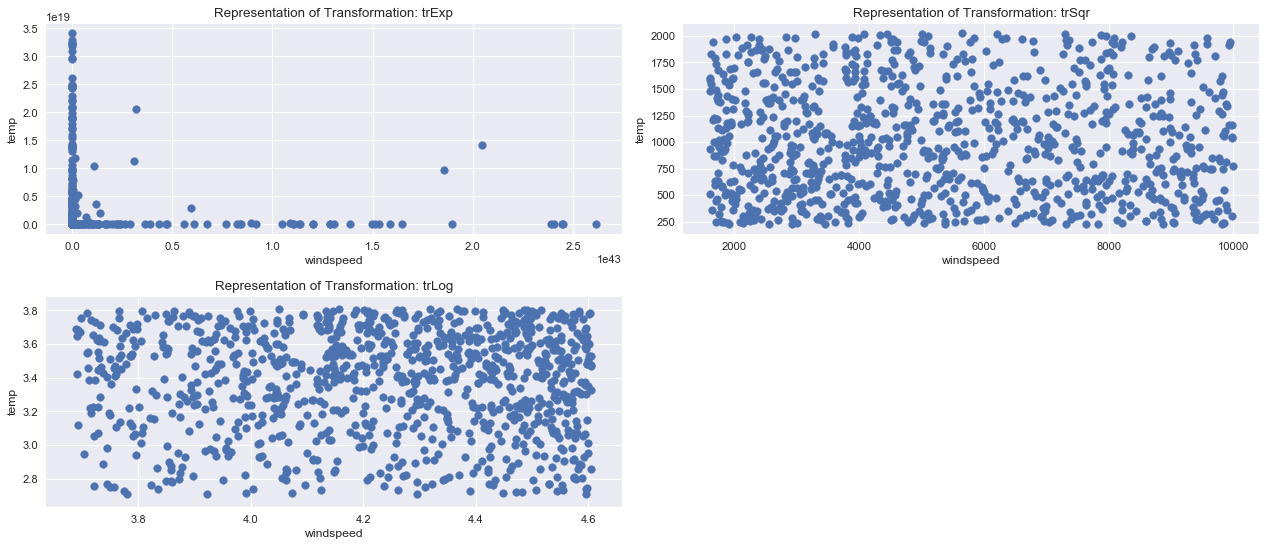

In [10]:
N = 4
cols = 2
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols, width_ratios=[1, 1])

plt.figure(figsize=(16,7), dpi=80)
i=0
for callable in DtTransformation.__dict__.values():
    try:
        print callable.__name__
        plt.subplot(gs[i])
        dta = dtf.applymap(callable)
        
        plt.scatter(dta.windspeed.values, dta.temperature.values)
        plt.xlabel('windspeed')
        plt.ylabel('temp')
        plt.title("Representation of Transformation: %s"%callable.__name__)
        i+=1
    except AttributeError, TypeError:
        pass
plt.tight_layout()
plt.show()

Contoh diatas menggambarkan bagaimana beberapa bentuk data transformation dapat diimplementasikan terhadap dataset dimana memiliki fitur dengan tipe berbeda agar dapat dianalisa.

> tentu pada kenyataanya data transformation yang kita temui tidak akan semudah contoh diatas, banyak hal yang perlu diperhatikan, dan transformation yang dilakukan pun sepertinya tidak bisa asal saja diterapkan.

* * *

Kemudian, transformasi apa dalam hal bahasa yang bisa diimplementasikan:

Pertama, sepertinya kita harus memberikan notasi pengganti, dimana diharapkan dapat menggantikan setiap lexeme/word/term/kata pada Lexicon yang telah kita dapat diatas, agar dapat digunakan dalam perhitungan.

In [11]:
# We can use list to get index num
lexicon = list(Lexicon)

# new storage which every number represent an index of term
doc_to_ix = []

for doc in all_documents:
    doc_to_ix.append([lexicon.index(term) for term in wordTokenize(doc)])  
        
print doc_to_ix[0]
print [lexicon[ix] for ix in doc_to_ix[0]]
print "\nOriginal documents - num 0:\n",all_documents[0]

[205, 176, 794, 600, 110, 359, 343, 1060, 643, 1025, 709, 359, 985, 1176, 1026, 794, 732, 342, 860, 1112, 744, 558, 1141, 191, 555, 1060, 600, 523, 1041, 194, 1162, 1103, 1041, 371, 923, 806, 286, 364, 850, 723, 339, 671, 510, 479, 1083, 786, 912, 689, 794, 912, 47, 1045, 510, 981, 1046, 486, 794, 335, 935, 185, 690, 965, 923, 806, 286, 364, 331, 723, 1111, 860, 1116, 466, 1144, 653, 425, 926, 663, 691, 147, 810, 531, 273, 935, 286, 1139, 569, 209, 1061, 1022, 364, 559, 623, 398, 209, 1175, 335, 559, 862, 1071, 147, 923, 954, 286, 364, 1176, 591, 860, 689, 794, 860, 1116, 800, 209, 1028, 726, 82, 1023, 992, 1116, 806, 286, 364, 772, 650, 270, 668, 498, 650, 956, 286, 364, 1061, 339, 671, 663, 479, 1120, 473, 653, 690, 437, 260, 948, 1103, 1041, 371, 653, 794, 199, 663, 806, 286, 364, 576, 723, 1111, 1116, 581, 222, 1065, 630, 497, 93, 660, 143, 809, 917, 269, 336, 536, 1112, 565, 494, 229, 593, 794, 732, 342, 437, 335, 1017, 689, 1130, 1070]
['Ini', 'adalah', 'sesi', 'yang', 'menyenang

Dengan menggunakan index num, secara sederhana sudah dapat merepresentasikan lexeme.

> An index is an indicator or measure of something, while in math index of a number says how many times to use the number in a multiplication and the plural of index is indices ~MathIsFun~

In [12]:
print "as array:"
print np.asarray(doc_to_ix)[0]

as array:
[205, 176, 794, 600, 110, 359, 343, 1060, 643, 1025, 709, 359, 985, 1176, 1026, 794, 732, 342, 860, 1112, 744, 558, 1141, 191, 555, 1060, 600, 523, 1041, 194, 1162, 1103, 1041, 371, 923, 806, 286, 364, 850, 723, 339, 671, 510, 479, 1083, 786, 912, 689, 794, 912, 47, 1045, 510, 981, 1046, 486, 794, 335, 935, 185, 690, 965, 923, 806, 286, 364, 331, 723, 1111, 860, 1116, 466, 1144, 653, 425, 926, 663, 691, 147, 810, 531, 273, 935, 286, 1139, 569, 209, 1061, 1022, 364, 559, 623, 398, 209, 1175, 335, 559, 862, 1071, 147, 923, 954, 286, 364, 1176, 591, 860, 689, 794, 860, 1116, 800, 209, 1028, 726, 82, 1023, 992, 1116, 806, 286, 364, 772, 650, 270, 668, 498, 650, 956, 286, 364, 1061, 339, 671, 663, 479, 1120, 473, 653, 690, 437, 260, 948, 1103, 1041, 371, 653, 794, 199, 663, 806, 286, 364, 576, 723, 1111, 1116, 581, 222, 1065, 630, 497, 93, 660, 143, 809, 917, 269, 336, 536, 1112, 565, 494, 229, 593, 794, 732, 342, 437, 335, 1017, 689, 1130, 1070]


Okai, sekarang kita sudah bisa memberikan numeric notation sebagai representasi setiap lexeme pada corpus, selanjutnya apa ?

> pada beberapa kesempatan lalu, ada rekan yang bertanya, "kira-kira enak dimulai dari mana kalau ingin mempelajari NLP, dari Machine Learning atau langsung NLP ?".
Pertanyaan tersebut seperti, "Lebih enak mana, makan gorengannya dahulu setelah itu cabai, atau cabai dahulu setelah itu gorengan ?"

Natural Language Processing, seperti lainnya, sulit untuk berdiri sendiri, tanpa adanya pengaruh dari cabang keilmuan lain. Jadi mau mulai dari mana dahulu, itu preferensi masing-masing.

* * *
## Language in Statistics
> The entire subject of statistics is based around the idea that you have this big set of data, and you want to analyse that set in terms of the relationships between the individual points in that data set.

so how do we measure relationship of a text document ?

Dalam statistik kita mengetahui bahwa untuk mengetahui asosiasi antar variable terdapat beberapa metode, seperti:
1. Correlation (if you have 2 variable exactly)
2. ANOVA (if you have more than 2 variable)

Biasanya kapanpun kita memulai suatu analisa statistik, kita tertarik pada 2 hal dasar yaitu:
1. **Central Tendency**, dalam hal ini biasa diwakilkan oleh Mean, Median dan Mode.
2. ** Measure of Dispersion**, dalam hal ini biasa diwakilkan oleh Variance dan Standard Deviation.

baik kita mulai dari yang pertama:

> sebelum kita mulai, mungkin yang perlu diingat terlebih dahulu mengenai data transformation. merupakan hal yang cukup penting untuk diperhatikan disaat mendapatkan ketidaksamaan nilai ukur antar variable yang dianalisa.

Diatas saya telah menuliskan, biasanya ketika kita akan memulai statistikal data analysis kita akan tertarik pada 2 hal dasar, yaitu **Central of Tendency** dan **Measure of Dispersion**.

bagaimana kita bisa mendapatkan Mean, Median atau Mode dari Corpus(dataset pada NLP biasa disebut demikian) atau Lexicon diatas, sedangkan data kita bertipe categorical ?

> Contoh *Game of Chances* atau *Court Trial* sepertinya seringkali kita temui pada buku pembahasan statistik, anggaplah kita menghadiri persidangan masalah pencurian 2 buah jengkol oleh nenek A di kebun pejabat S(Setan), persidangan tersebut menghadirkan 10 juri yang 9 diantaranya bayaran si pejabat S, kita persingkat hasil persidangan tersebut akan memutuskan si nenek bersalah atau tidak dari banyaknya vote yang diambil dari perhitungan suara juri dengan label 'Bersalah' dan 'Gagal Bersalah'. seperti yang telah kita ketahui 9 perhitungan suara memutuskan nenek tersebut bersalah dan 1 menyatakan gagal bersalah.

Kita pinjam sedikit ide cerita konyol diatas untuk diterapkan, kita akan menghitung Term Frequency Occurance dari lexem menyeluruh dalam Corpus. 

pengambilan ide diatas saya buat secara putus asa karena, menurut saya, jika kita ingin mencari Rata-rata/Mean dari sebuah variable, maka variable tersebut harus memiliki Sense of Measurement atau nilai yang bisa dijadikan tolak ukur, seperti 'Baik' atau 'Gagal Baik', karena kita tidak akan pernah bisa menghitung rata-rata nilai ujian Fisika pada suatu sekolah yang tidak memiliki murid bukan ?(tolong jangan jawab dengan nilai 0, biar cepat ini kawan...).

In [13]:
# for the shake of simplicity, we should create tokenized corpus
from itertools import chain
from operator import add

# just compare best fastest way
%timeit list(chain.from_iterable(tokenized_corpus))
%timeit list(chain(*tokenized_corpus)) #same as above
%timeit [j for i in tokenized_corpus for j in i]
%timeit reduce(add, tokenized_corpus)

combined_corpus = reduce(add, tokenized_corpus)

10000 loops, best of 3: 48.1 µs per loop
10000 loops, best of 3: 40 µs per loop
10000 loops, best of 3: 66.9 µs per loop
10000 loops, best of 3: 30.5 µs per loop


Saya rasa menjadi pilihan yang buruk jika kita simpan Term-Frequency data kedalam sebuah dictionary, karena dictionary kita tidak dapat menyimpan index, yang nanti akan kita butuhkan untuk num-to_word-reverse.
> By def. dictionary is unordered collection of key-value pair. so you cant have an index for the key-value pair.

In [14]:
from collections import Counter, defaultdict

def cnt1(var):
    return Counter(var)

def cnt2(var):
    term_freq_matrix = defaultdict(int)
    for term in var:
        term_freq_matrix[term] += 1
        
def termToFreq(var):
    term_freq_matrix = {}
    for term in var:
        term_freq_matrix[term] = term_freq_matrix.get(term, 0) + 1
    return term_freq_matrix

def cnt4(var):
    return {x:var.count(x) for x in var}

%timeit cnt1(combined_corpus)
%timeit cnt2(combined_corpus)
%timeit termToFreq(combined_corpus)
%timeit cnt4(combined_corpus)

# berisi dictionary dengan key:term, value:term_frequency
term_freq_matrix = termToFreq(combined_corpus)

1000 loops, best of 3: 688 µs per loop
1000 loops, best of 3: 410 µs per loop
1000 loops, best of 3: 433 µs per loop
10 loops, best of 3: 58 ms per loop


Akhirnya kita memiliki dictionary yang berisi pair of lexicon with his frequency(term_frequency) of occurance across corpus.

#### Data Visualization

Sebagai programmer yang terlebih dahulu menyelami backend system, sebetulnya saya kurang menyukai visualisasi, karena kalau sudah berhubungan dengan tampilan, pasti hasil saya buruk(sadar diri).

Dalam data analysis, beberapa alasan sepertinya saya temukan kenapa proses ini cukup penting(walaupun tidak kritikal):
1. Anggap anda sedang meeting dengan user membahas proyek milyaran untuk data analytic. Anda sodorkan tampilan console hitam dengan banyak berisi notasi-notasi, symbol-symbol matematik rumit dan hasil perhitungan yang hebat berwarna putih. Panjang lebar anda bercerita, seringkali si client pada akhirnya hanya akan berkata "apa yang coba anda jelaskan?" Atau jika ia sedikit berbaik hati "apa gunanya itu untuk saya?".
* Jika kita memiliki data yang cukup besar, dimana monitor kita tidak sanggup menampung hasil output dari perhitungan, visualisasi dapat sangat membantu untuk mempertontonkan bagaimana wujud lain dari data kita.
* Membantu kita untuk melihat pola dalam data.

In [15]:
from collections import OrderedDict
# This another way to get `term_freq_matrix`
class OrderedCounter(Counter, OrderedDict):
    def __repr__(self):
        return '%s(%r)' % (self.__class__.__name__, OrderedDict(self))

    def __reduce__(self):
        return self.__class__, (OrderedDict(self),)
#%timeit OrderedCounter(combined_corpus)
cntr=OrderedCounter(combined_corpus)

%timeit cntr.keys().index('dan')
%timeit lexicon.index('dan')

10000 loops, best of 3: 92.2 µs per loop
100000 loops, best of 3: 4.83 µs per loop


In [16]:
tfm = pd.DataFrame({'Term':term_freq_matrix.keys(),'Freq':term_freq_matrix.values()})
tfm

,Freq,Term
0,1,lho.
1,1,menabung.
2,1,sambung
3,1,"nanti,"
4,1,mengapa
5,1,"1,5"
6,1,mengecek
...,...,...
1171,1,fresh
1172,2,duitnya


In [17]:
# n most frequent words across corpus
n=5
tfm.sort_values('Freq', ascending=False).head(n)

,Freq,Term
600,78,yang
335,32,dan
359,31,untuk
653,30,di
93,22,dengan


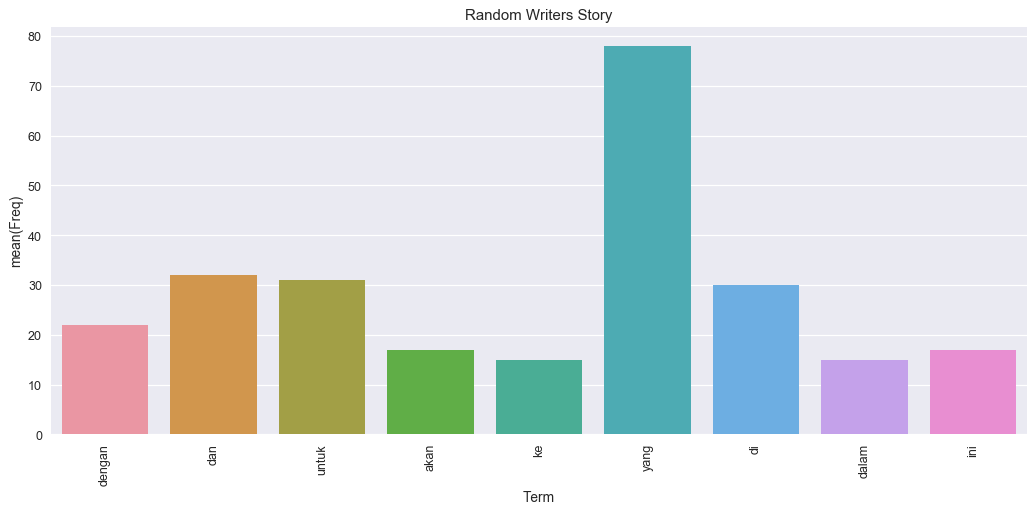

In [18]:
fig_tf,ax_tf = plt.subplots(figsize=(14,6),dpi=90)
tfm_filter = tfm.loc[tfm['Freq']>=15]

sns.barplot(x='Term',y='Freq',data=tfm_filter)
plt.xlabel('Term')
plt.title('Random Writers Story')
plt.xticks(rotation=90)
plt.show()

Mungkin sering kita baca dalam pembahasan statistik, terutama ketika membahas data distribution, untuk pentingnya data terdistribusi secara normal. Meskipun demikian, **normal distribution hanya berlaku untuk tipe data continuous/quantitative**.

**Bahasa** pada dasarnya berupa **qualitative/categorical variable**, histogram yang kita gunakan dibawah sebetulnya digunakan untuk tipe data quantitative. Meskipun demikian, qualitative data dapat dipresentasikan oleh histogram dengan cara melakukan binning, gampangnya mengelompokkan data menjadi beberapa interval(kerana interval adalah quantitative data) tertentu.

> Number is so pure, visualization is part of our life while though quite a bit rough. I encourage you, whenever you have chance to visualize the number, visualize it... do not excuse !

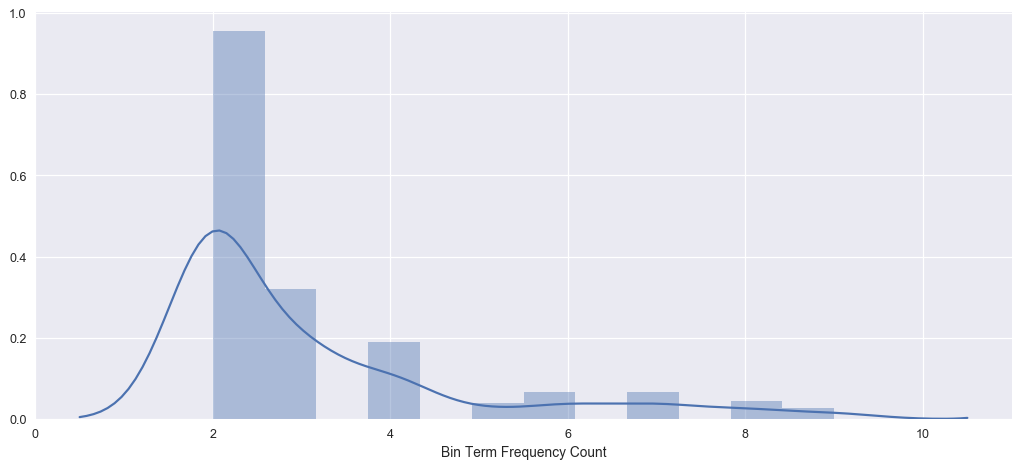

In [19]:
tfm_filter_2 = tfm.loc[(tfm['Freq']>1) & (tfm['Freq']<10)]
fig_tf2,ax_tf2 = plt.subplots(figsize=(14,6),dpi=90)
sns.distplot(tfm_filter_2['Freq'], ax=ax_tf2, kde=True)
plt.xlabel('Bin Term Frequency Count')
plt.show()

In [20]:
print "Quantitative Statistical Summary:"
print "-"*40
print tfm['Freq'].describe()
print "\nDataset Variance:",tfm['Freq'].var()
print "Dataset Kurtosis:",tfm['Freq'].kurt()
print "Dataset Skew:",tfm['Freq'].skew()

Quantitative Statistical Summary:
----------------------------------------
count    1178.000000
mean        1.851443
std         3.281083
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        78.000000
Name: Freq, dtype: float64

Dataset Variance: 10.7655076862
Dataset Kurtosis: 264.42760213
Dataset Skew: 13.3430887851


Jadi apa yang bisa kita lakukan dengan qualitative data ?

Okay sebelum kita jawab pertanyaan diatas, mari kita kaji sejenak mengenati distribusi statistik, berikut definisi yang menurut saya cukup mudah dicerna:

> The distribution of a statistical data set (or a population) **is a listing or function showing all the possible values (or intervals) of the data and *how often they occur* **.
When **a distribution of categorical(qualitative) data** is organized, you see the number or percentage of individuals in each group.
When **a distribution of numerical(quantitative) data** is organized, they’re often ordered from smallest to largest, broken into reasonably sized groups (if appropriate), and then put into graphs and charts to examine the shape, center, and amount of variability in the data. ~dummies.com~

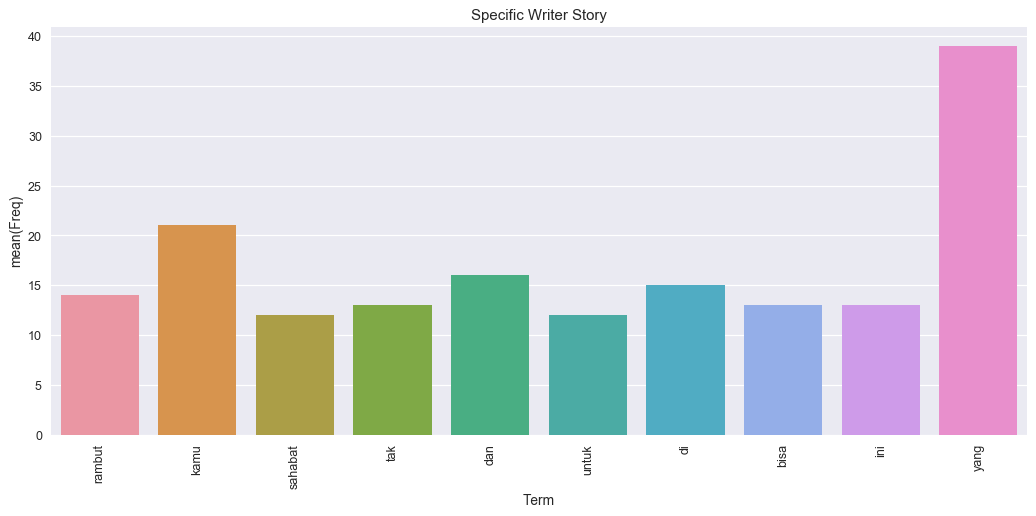

In [21]:
stories=[
    """Setiap manusia yang hidup di dunia pasti memiliki sahabat. Entah sahabat sepermainan sejak kecil, sahabat di bangku sekolah, maupun sahabat baru kamu temukan saat duduk di bangku kuliah. Hal ini dikarenakan sifat dasar yang kamu miliki sebagai makhluk sosial: tak bisa hidup seorang diri. Secara ilmiah, manusia dikatakan hanya mampu memiliki lima sahabat dekat dalam satu waktu. Namun hal ini bukan berarti kamu tak bisa berteman, lho. Kamu bisa memiliki lebih dari lima sahabat, hanya saja kadar kelekatan emosinya tak sedalam itu. Hal ini dikarenakan terbatasnya kapasitas otak yang kamu miliki. Sekarang, coba telaah kembali seluruh sahabat terdekat kamu. Sudah berapa lama kalian menjalin hubungan persahabatan? Belasan tahun sejak masih mengenakan seragam di bangku SMP, atau baru seumur jagung saat bertemu di bangku kuliah dulu? Setiap manusia yang hidup di dunia pasti memiliki sahabat. Entah sahabat sepermainan sejak kecil, sahabat di bangku sekolah, maupun sahabat baru kamu temukan saat duduk di bangku kuliah. Hal ini dikarenakan sifat dasar yang kamu miliki sebagai makhluk sosial: tak bisa hidup seorang diri. Secara ilmiah, manusia dikatakan hanya mampu memiliki lima sahabat dekat dalam satu waktu. Namun hal ini bukan berarti kamu tak bisa berteman, lho. Kamu bisa memiliki lebih dari lima sahabat, hanya saja kadar kelekatan emosinya tak sedalam itu. Hal ini dikarenakan terbatasnya kapasitas otak yang kamu miliki. Sekarang, coba telaah kembali seluruh sahabat terdekat kamu. Sudah berapa lama kalian menjalin hubungan persahabatan? Belasan tahun sejak masih mengenakan seragam di bangku SMP, atau baru seumur jagung saat bertemu di bangku kuliah dulu? Sedangkan kamu yang punya sedikit sahabat namun memiliki kedekatan emosi yang dalam, cenderung lebih bahagia dan memiliki gambaran diri yang lebih baik saat ketika dewasa. Hal ini dikarenakan dukungan dan perasaan positif yang diterima dari hubungan persahabatan tersebut. Dan yang terpenting, emosi positif ini dibangun tepat saat kamu memasuki fase pembentukan identitas sosial (remaja). "Sejak kehadiran teknologi yang mempermudah manusia untuk membangun jaringan sosial yang dangkal, tetap memusatkan waktu dan perhatian untuk membangun hubungan pertemanan yang dalam dengan beberapa individu itu harus jadi prioritas," tutur Joseph Allen, psikolog dari University of Virginia, seperti dilansir Metro. "Disukai oleh sekelompok besar orang tak akan bisa menggantikan tempaan atau dampak dari hubungan persahabatan yang dalam dan suportif," sambungnya lagi. Bagaimana pendapat kamu terkait hal ini? Sudah bersiap untuk segera menghubungi sahabat kesayangan?""",
    """Bagi sebagian besar kaum hawa, kerontokan rambut merupakan masalah kecantikan yang paling sering dialami. Terlebih bagi kamu yang memiliki rambut panjang. Helaian rambut yang panjang dan berat membebani akar rambut, sehingga kerontokan rentan terjadi. Biasanya, rambut cenderung berguguran lebih banyak sehabis keramas ataupun ketika kamu menyisir rambut. Duh! Jika sudah melihat tumpukan rambut yang bertebaran di lantai, kamu pun panik dan segera melakukan pertolongan pertama, menggunting rambut hingga pendek. Hal ini biasanya dilakukan kaum hawa dengan harapan, rambut rontok jadi berkurang, kepala pun terasa ringan. Apakah kamu salah satu yang pernah melakukannya? Atau bahkan sudah putus asa melihat banyaknya helai rambut yang tersangkut di sisir, dan sudah berencana untuk pergi ke salon terdekat? Jika ya, ada baiknya kamu mengetahui trik unik yang dilakukan Andrea Coson. Perempuan berusia 33 tahun asal Micronesia ini terkenal akan rambut panjangnya yang berkilau dan indah. Saking panjangnya, Andrea bahkan dijuluki sebagai Rapunzel hidup. Kemana pun ia melangkah, Andrea selalu dihujani tatapan takjub dan pujian atas rambut indahnya. Andrea memiliki rambut cokelat dengan panjang mencapai 163 sentimeter, jatuh tepat pada pergelangan kakinya. Andrea telah memanjangkan rambutnya sejak masih berusia kanak-kanak. "Banyak orang menanyakan pertanyaan yang sama, apakah ini asli?" tutur Andrea kepada Daily Mail. "Aku tak pernah menerima respons negatif, malah banyak yang sangat manis. Mereka menyamakan aku dengan Rapunzel, yang membuatku senang," ujarnya sembari tersenyum. Lantas, apa yang jadi rahasia Andrea dalam menjaga kesehatan rambut panjangnya? Rahasia utamanya: konsumsi satu sendok makan selai kacang setiap hari! Andrea mengaku bahwa dirinya selama bertahun-tahun, sejak dulu, secara konsisten melakukan hal ini. Menurutnya, selai kacanglah yang membuat akar rambutnya jadi lebih kuat dan tak mudah rontok. Selain itu, Andrea juga menerapkan pola keramas yang cukup unik: kondisioner-sampo-kondisioner. Ini dilakukannya untuk menjaga rambut tetap lembut dan tidak kering. Ia juga rutin merawat rambutnya dengan mengaplikasikan minyak kelapa, dua kali dalam seminggu. Sesekali, Andrea bahkan mencuci rambutnya dengan menggunakan cuka apel. Wow! Menyisir rambut perlahan dengan menggunakan sisir bergigi jarang jadi rutinitas wajib bagi perempuan ini. "Aku sudah melakukannya rutin selama bertahun-tahun, dan aku secara jujur bisa mengatakan bahwa selai kacang membuat rambutku jadi sehat dan kuat, juga membuatnya jadi tumbuh makin cepat," bagi Andrea lagi. Bagaimana komentar kamu? Tertarik untuk coba mengikuti jejak Andrea?""",
    """Saat hendak berlibur ke pantai, sunscreen jadi andalan semua orang untuk melindungi kulit dari paparan sinar matahari. Harapannya satu: agar kulit tak gosong dan perih akibat terbakar. Banyak yang beranggapan, makin tinggi SPF sunscreen yang dikenakan, makin baik juga perlindungan yang diberikan untuk kulit. Namun tahukah kamu, bahwa anggapan ini tak sepenuhnya benar? Faktanya, angka SPF yang tertera pada kemasan sunscreen merupakan indikator lamanya waktu perlindungan yang mampu diberikan. Makin tinggi kadar SPF, makin lama juga durasi reaplikasi sunscreen. "Pada kenyataannya kalau kita lihat secara ilmiah, SPF di atas 50 sebetulnya perlindungannya tak akan jauh berbeda," dr. Srie Prihianti Gondokaryono, SpKk, PhD, FINSDV, FAADV, saat ditemui kumparan (kumparan.com) dalam acara NIVEA #ILoveMyBody, di Mall Taman Anggrek, Jakarta Barat, Jumat (25/8). "Hanya kuncinya adalah angka yang tertera jadi indikasi kapan kita harus mengaplikasikan ulang," papar sekretaris umum dari Perhimpunan Dokter Spesialis Kulit dan Kelamin Indonesia (PERDOSKI) ini. Berdasarkan teori, kulit orang Asia memiliki daya tahan selama 10 menit saja di bawah paparan sinar matahari. Oleh karenanya, dibutuhkan sun screen untuk melindungi kulit lebih lama. Jika dihitung, SPF 30 mampu melindungi kulit selama 300 menit kedepan. Lebih dari itu, kamu harus mengaplikasikan sunscreen secara berulang. Namun menurut Prihianti, hal ini tidaklah bisa dijadikan sebagai patokan utama. Karena pemakaian sunscreen sangatlah tentatif. "Sulit mengukurnya. Terlebih kalau kamu beraktivitas luar ruangan seharian, kena air, panas, keringat, dia bisa luntur," ujarnya. "Makanya paling tidak sunscreen harus diulang dua jam, berapapun SPF yang kamu pakai," paparnya lagi. Cara pemakaian sunscreen juga tak bisa sembarangan, lho. Untuk mendapatkan perlindungan maksimal, kamu harus mengenakan tabir surya sesuai dosis tepat. "Banyak sekali orang yang hanya mengenakan sun screen 30 persen dari takaran normalnya. Kalau begini, perlindungan SPF yang mulanya 25 bisa berkurang jadi 15," ujar Prihantini menyayangkan. Lantas, berapa dosis tepat sunscreen yang harus kamu gunakan? "Caranya, pakai dua ruas jari (telunjuk dan tengah), ambil sebanyak dua ruas jari, bisa dioleskan untuk satu tangan (sepanjang lengan)," jelasnya. "Bisa juga pakai satu sendok teh untuk seluruh muka. Dua sendok untuk badan," ujarnya sembari mencontohkan. Jadi, jangan sampai salah, ya!"""
]

tok_stories = [wordTokenize(story) for story in stories]
combined_stories = reduce(add, tok_stories)
storiesterm_freq_matrix = termToFreq(combined_stories)

tfm_stories = pd.DataFrame({'Term':storiesterm_freq_matrix.keys(),'Freq':storiesterm_freq_matrix.values()})


fig_tfstories,ax_tfstories = plt.subplots(figsize=(14,6),dpi=90)
tfmstories_filter = tfm_stories.loc[tfm_stories['Freq']>=12]

sns.barplot(x='Term',y='Freq',data=tfmstories_filter)
plt.xlabel('Term')
plt.title('Specific Writer Story')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Here pandas would also provide categorical statistic summaries
print "Qualitative Statistical Summary:"
print "-"*35
print pd.DataFrame(combined_corpus).describe(),"\n"#combined_corpus,combined_stories
print "'Count' is how many total term(with duplicity) are in corpus"
print "'Unique' is how many term(no duplicity) are in corpus"
print "\nComparing to vocabulary from Lexicon:%d"%len(Lexicon)

Qualitative Statistical Summary:
-----------------------------------
           0
count   2181
unique  1178
top     yang
freq      78 

'Count' is how many total term(with duplicity) are in corpus
'Unique' is how many term(no duplicity) are in corpus

Comparing to vocabulary from Lexicon:1178


Oke, jadi Count Frequency setiap term bisa digunakan sebagai statistical distribution, diatas juga kita melihat bagaimana secara singkat Pandas bisa mendeskripsikan baik itu categorical atau nominal variable.

Jika berbicara mengenai data science(saya sendiri masih mencari istilah ini sebetulnya muncul dari mana), sebetulnya kita juga berbicara mengenai banyak penerapan cabang keilmuan yang turut berperan, bukan hanya matematik dan statistik, atau pemgrograman.

Karenanya setelah mengetahui fakta distribusi data diatas, jika kawan merasa bingung untuk melanjutkan kemana,  mencari adanya **asosiasi** atau **relationship** antar setiap term(variablle) bisa menjadi pilihan bijak untuk langkah selanjutnya. The most common method biasanya ada diantara *Correlation* dilanjutkan dengan *Regression*, but we need to more careful, every statistical method is lie with his statistical assumption which some of them cannot be violated.

> The type of analysis chosen depends on the research design, characteristics of the variables, shape of the distributions, level of measurement, and whether the assumptions required for a particular statistical test are met. ~Robert S Michael~

* * *
#### Learning Relationship

the most frequently used non-parametric statistic for testing hypothese with nominal data is Chi-Square.
The nature of nominal one involves assigning data to mutual exclusive categories, labeling or naming the data. Nominal
data most generally analyzed by frequency of occurence.

> The non-parametric statistic Chi-Square is comparison of relative frequencies among two or more groups.

A parameter is a quantity which is constant for given population. Parameter can also be defined as
numerical descriptive measures of a population.

Diatas kita telah mendapatkan 2 tipe parameter seperti **Central Tendency** and **Variability**(measure of Dispersion).

> General definition for parameter is a numerical or other measurable factor forming one of a set that defines a system or sets the conditions of its operation. 

Ketika suatu **Nominal** variable diharuskan memiliki urutan berdasar derajat kepentingan(biasanya disepakati bersama), maka variabel tersebut dinamakan **Ordinal**.

> A nominal variable is another name for a categorical variable. Nominal variables have two or more categories without having any kind of natural order. they are variables with no numeric value, such as occupation or political party affiliation.

For example, the mean is a parameter which describes an entire distribution of values.  Obviously, these parameters cannot be obtained for nominal and ordinal data.

It follows then that statistics not dependent on calculating measures of central tendency or variability are non-parametric. However, this is not to say that parameters are not studied when using non-parametric statistics. One just does not know or make assumptions a bout any specific values of a parameter.

> Statisticians generally refer to T-tests and ANOVA tests as  parametric statistics.

Seperti yang telah saya tulis diatas, mencari **relationship** antar variable bisa menjadi langkah pilihan selanjutnya, kali ini Chi-Square Independent Test yang akan kita gunakan.

> The primary use of the chi-square test is to examine whether two variables are independent or not. What does it mean to be independent, in this sense? It means that the two factors are not related. Typically in social science research, we're interested in finding factors that are dependent upon each other—education and income, occupation and prestige, age and voting behavior. By ruling out independence of the two variables, the chi-square can be used to assess whether two variables are, in fact, dependent or not. More generally, we say that one variable is "not correlated with" or "independent of" the other if an increase in one variable is not associated with an increase in the another. If two variables are correlated, their values tend to move together, either in the same or in the opposite direction. Chi-square examines a special kind of correlation: that between two nominal variables. 

In [23]:
# Mari kita lihat bagaimana relasi antara setiap most_common_term di setiap document
# Get most common word on each document on corpus
for i, doc in enumerate(tokenized_corpus):
    print "Doc-"+str(i)+"::",Counter(doc).most_common(10)

Doc-0:: [('waktu', 7), ('sesi', 7), ('catatan', 7), ('menorehkan', 4), ('ini', 4), ('kedua', 4), ('setelah', 3), ('di', 3), ('dan', 3), ('detik.', 3)]
Doc-1:: [('dan', 9), ('kredit', 8), ('nelayan.', 7), ('KKP', 7), ('BLU', 6), ('BNI', 5), ('untuk', 5), ('dana', 4), ('dengan', 4), ('lebih', 4)]
Doc-2:: [('yang', 29), ('cake', 14), ('pillow', 13), ('dengan', 9), ('kue', 7), ('di', 6), ('Momoiro', 6), ('dari', 5), ('dan', 4), ('kami', 4)]
Doc-3:: [('yang', 11), ('kulit', 9), ('kanker', 7), ('orang', 6), ('dan', 6), ('itu', 5), ('ada', 5), ('di', 5), ('kamu', 5), ('karena', 5)]
Doc-4:: [('yang', 8), ('untuk', 7), ('di', 4), ('akan', 4), ('dari', 3), ('fitur', 3), ('seperti', 3), ('bisa', 3), ('suara', 3), ('info', 3)]
Doc-5:: [('yang', 17), ('mobil', 12), ('ke', 10), ('gue', 8), ('untuk', 6), ('Raja', 6), ('Tanta', 6), ('Gue', 6), ('punya', 5), ('kalau', 5)]
Doc-6:: [('yang', 8), ('untuk', 7), ('Khofifah', 6), ('Jawa', 6), ('Gus', 6), ('dan', 5), ('di', 4), ('masih', 4), ('dengan', 4), ('

In [24]:
# Kita juga bisa melihat frequency setiap term/lexeme/kata/word pada setiap document
wordsfreq_accorpus = []
keyword=[]#['yang','dan','di']
for i, doc in enumerate(tokenized_corpus):
    if len(keyword) > 0:
        for term in keyword:
            wordsfreq_accorpus.append((i,term,Counter(doc)[term]))
    else:
        for term in tfm_filter['Term']:
            wordsfreq_accorpus.append((i,term,Counter(doc)[term]))


dfwordsfreq_accorpus = pd.DataFrame(wordsfreq_accorpus, columns=['document', 'term', 'freq'])
dfwordsfreq_accorpus.set_index(['document'])
#pv_dfwordsfreq_accorpus = dfwordsfreq_accorpus.pivot(index='document', columns='term', values='freq')
pv_dfwordsfreq_accorpus = pd.pivot_table(data=dfwordsfreq_accorpus,index='document', columns='term', \
                                         values='freq', aggfunc='sum',margins=True)
pv_dfwordsfreq_accorpus

term,akan,dalam,dan,dengan,di,ini,ke,untuk,yang,All
document,,,,,,,,,,
0,1.0,1.0,3.0,1.0,3.0,4.0,1.0,2.0,2.0,18.0
1,1.0,3.0,9.0,4.0,3.0,2.0,0.0,5.0,3.0,30.0
2,2.0,4.0,4.0,9.0,6.0,2.0,2.0,3.0,29.0,61.0
3,1.0,3.0,6.0,2.0,5.0,4.0,1.0,1.0,11.0,34.0
4,4.0,0.0,2.0,2.0,4.0,3.0,0.0,7.0,8.0,30.0
5,4.0,3.0,3.0,0.0,5.0,2.0,10.0,6.0,17.0,50.0
6,4.0,1.0,5.0,4.0,4.0,0.0,1.0,7.0,8.0,34.0
All,17.0,15.0,32.0,22.0,30.0,17.0,15.0,31.0,78.0,257.0


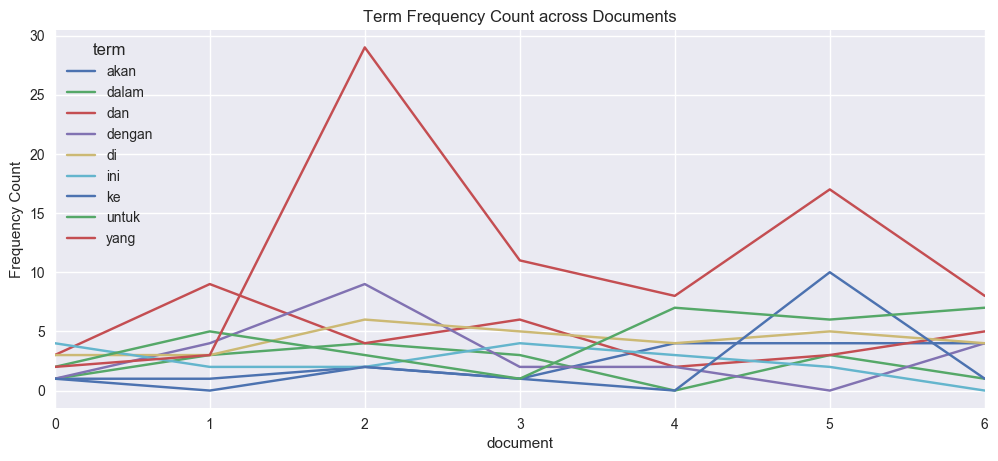

In [25]:
fig_wfa, ax_wfa = plt.subplots(figsize=(12,5), dpi=100)
pv_dfwordsfreq_accorpus.ix[0:pv_dfwordsfreq_accorpus.index.size-1,\
                           0:len(pv_dfwordsfreq_accorpus.columns)-1].plot(ax=ax_wfa)
plt.title("Term Frequency Count across Documents")
plt.ylabel('Frequency Count')
plt.show()

Find the observed value of all variable.

In [26]:
#Change index name
oldix=list(pv_dfwordsfreq_accorpus.index)
oldix[len(oldix)-1] = 'col_totals'
pv_dfwordsfreq_accorpus.index = oldix

#Change Columns name
oldcols=list(pv_dfwordsfreq_accorpus.columns)
oldcols[len(oldcols)-1] = 'row_totals'
pv_dfwordsfreq_accorpus.columns = oldcols

pv_dfwordsfreq_accorpus

,akan,dalam,dan,dengan,di,ini,ke,untuk,yang,row_totals
0,1.0,1.0,3.0,1.0,3.0,4.0,1.0,2.0,2.0,18.0
1,1.0,3.0,9.0,4.0,3.0,2.0,0.0,5.0,3.0,30.0
2,2.0,4.0,4.0,9.0,6.0,2.0,2.0,3.0,29.0,61.0
3,1.0,3.0,6.0,2.0,5.0,4.0,1.0,1.0,11.0,34.0
4,4.0,0.0,2.0,2.0,4.0,3.0,0.0,7.0,8.0,30.0
5,4.0,3.0,3.0,0.0,5.0,2.0,10.0,6.0,17.0,50.0
6,4.0,1.0,5.0,4.0,4.0,0.0,1.0,7.0,8.0,34.0
col_totals,17.0,15.0,32.0,22.0,30.0,17.0,15.0,31.0,78.0,257.0


> Observed Frequency is the amount of time an event did actually occur after the repeated experiments were completed

In [27]:
observed = pv_dfwordsfreq_accorpus.ix[0:pv_dfwordsfreq_accorpus.index.size-1,\
                                      0:len(pv_dfwordsfreq_accorpus.columns)-1]
observed

,akan,dalam,dan,dengan,di,ini,ke,untuk,yang
0,1.0,1.0,3.0,1.0,3.0,4.0,1.0,2.0,2.0
1,1.0,3.0,9.0,4.0,3.0,2.0,0.0,5.0,3.0
2,2.0,4.0,4.0,9.0,6.0,2.0,2.0,3.0,29.0
3,1.0,3.0,6.0,2.0,5.0,4.0,1.0,1.0,11.0
4,4.0,0.0,2.0,2.0,4.0,3.0,0.0,7.0,8.0
5,4.0,3.0,3.0,0.0,5.0,2.0,10.0,6.0,17.0
6,4.0,1.0,5.0,4.0,4.0,0.0,1.0,7.0,8.0


To find the expected frequencies, we assume independence of the rows and columns.

> The Expected Frequency is the number of times specific outcome is expected to occur when a probability of experiment or a probability trial is repeated a number of times.

In [28]:
total_margins=sum(pv_dfwordsfreq_accorpus["row_totals"][0:pv_dfwordsfreq_accorpus.index.size-1])
expected =  np.outer(pv_dfwordsfreq_accorpus["row_totals"][0:pv_dfwordsfreq_accorpus.index.size-1],
                     pv_dfwordsfreq_accorpus.ix["col_totals"][0:len(pv_dfwordsfreq_accorpus.columns)-1]) / total_margins

expected = pd.DataFrame(expected)

expected.columns = list(pv_dfwordsfreq_accorpus.columns[:-1])
expected.index = list(pv_dfwordsfreq_accorpus.index[:-1])

expected

,akan,dalam,dan,dengan,di,ini,ke,untuk,yang
0,1.190661,1.050584,2.241245,1.540856,2.101167,1.190661,1.050584,2.171206,5.463035
1,1.984436,1.750973,3.735409,2.568093,3.501946,1.984436,1.750973,3.618677,9.105058
2,4.035019,3.560311,7.595331,5.221790,7.120623,4.035019,3.560311,7.357977,18.513619
3,2.249027,1.984436,4.233463,2.910506,3.968872,2.249027,1.984436,4.101167,10.319066
4,1.984436,1.750973,3.735409,2.568093,3.501946,1.984436,1.750973,3.618677,9.105058
5,3.307393,2.918288,6.225681,4.280156,5.836576,3.307393,2.918288,6.031128,15.175097
6,2.249027,1.984436,4.233463,2.910506,3.968872,2.249027,1.984436,4.101167,10.319066


> Expected value simply a predicted value of a variable, calculated as the sum of all possible values each multiplied by the probability of its occurrence.

How do we get 0.868421 for term 'ada' in row 0, col 0 ?
$$ ExpectedCount\quad =\quad RowTotal\quad x\quad \frac { ColumnTotal }{ TotalMargin } $$


$$ 0.868421\quad =\quad 30\quad x\quad \frac { 11 }{ 380 } \quad ... $$

In [70]:
chi2, p, df ,expected = stats.chi2_contingency(observed, correction=True)
print "Chi: %.5f , p-value: %.10f, degree-of-freedom: %d"%(chi2, p, df)

Chi: 90.62488 , p-value: 0.0001960023, degree-of-freedom: 48


In [30]:
(chi2, p) == stats.chisquare(np.array(observed).ravel(), f_exp=expected.ravel(),
                             ddof=observed.size - 1 - df)
chi2

90.624883262049735

In [85]:
%timeit (((observed-expected)**2)/expected).sum().sum() # Manual way of computing chi2 of stats.chi2_contingency
%timeit stats.chi2_contingency(observed, correction=True)
%timeit stats.chisquare(np.array(observed).ravel(), f_exp=expected.ravel(), ddof=observed.size - 1 - df)

100 loops, best of 3: 1.5 ms per loop
1000 loops, best of 3: 289 µs per loop
1000 loops, best of 3: 217 µs per loop


In [31]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = df)   # *

print("Critical value: %.10f"%crit)

# Manual check of p-value
p_value = 1 - stats.chi2.cdf(x=(((observed-expected)**2)/expected).sum().sum(),  # Find the p-value
                             df=df)
print "\np-value: %.10f"%p_value

Critical value: 65.1707689036

p-value: 0.0001960023


Chi-Square Test for Independence membandingkan 2(atau lebih) categorical variable dalam sebuah Contigency Table(a table showing the distribution of one variable in rows and another in columns, used to study the association between the two variables.) untuk melihat apakah keduanya memiliki asosiasi.

> In a more general sense, Chi-Square Test for Independence do tests to see whether distributions of categorical variables differ from each another.

How do we interpret Chi-Square Test statistic value:
* A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship. 
* A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.

A low value for chi-square means there is a high *correlation* between your two sets of data. In theory, if your observed and expected values were equal (**no difference**) then chi-square would be zero — an event that is unlikely to happen in real life.

> First of all, the **Chi-square** test is only meant to test the probability of independence of a distribution of data. It **will NOT tell you any details about the relationship between them**. If you want to calculate how much more likely it is that a woman will be a Democrat than a man, the Chi-square test is not going to be very helpful. However, once you have determined the probability that the two variables are related (using the Chi-square test), you can use other methods to explore their interaction in more detail. For a fairly simple way of discussing the relationship between variables. The variables you consider must be mutually exclusive; participation in one category should not entail or allow participation in another. In other words, the data from all of your cells should add up to the total count, and no item should be counted twice.

Deciding whether a chi-square test statistic is large enough to indicate a statistically significant difference isn’t as easy it seems. It would be nice if we could say a chi-square test statistic >10 means a difference, but unfortunately that isn’t the case. 

You could take your calculated chi-square value and compare it to a critical value from a chi-square table. If the chi-square value is more than the critical value, then there is a significant difference.

You could also use a p-value. First state the null hypothesis and the alternate hypothesis. Then generate a chi-square curve for your results along with a p-value (See: Calculate a chi-square p-value Excel). Small p-values (under 5%) usually indicate that a difference is significant (or “small enough”).

Tip: The Chi-square statistic can only be used on numbers. They can’t be used for percentages, proportions, means or similar statistical value. For example, if you have 10 percent of 200 people, you would need to convert that to a number (20) before you can run a test statistic.

* * *
Hmm, akhirnya setelah melakukan beberapa transformasi, perubahan struktur serta beberapa pengamatan lain, kita mendapatkan 3 variable, yaitu Term, TermFrequency, DocumentNumber. When we do single variable analysis we name it Univariate and if more than 1 variable we simply name it Multivariate.

> The first step of most multivariate analyses is to calculate a matrix of distances or similarities among a set of items in a multidimensional space. ~ McCune and Grace ~

apa itu multidimensional ?...

sebelum kita tersesat jika melangkah kedepan, ada baiknya lagi-lagi sedikit menilik kebelakang.

In [32]:
#https://www.mathworks.com/help/matlab/math/multidimensional-arrays.html

## Language in Math
Pada salah satu cabang ilmu Matematika, dikenal nama Geometry ("measurement") yang menaruh hatinya untuk mengamati:
* shape
* size
* relative position of figures
* the properties of space

> Geometry arose independently in a number of early cultures as a practical way for dealing with lengths, areas, and volumes. ~Wikipedia~

Important concepts in geometry:
* Axioms
* **Points**
* **Lines**
* **Planes**
* **Angles**
* Curves
* Surfaces
* Manifolds
* Topologies and **metrics**
* Compass and straightedge constructions
* **Dimension**
* **Symmetry**
* Non-**Euclidean** geometry
(from wikipedia)
* * * 
Kita pasti masih ingat ketika kita sedang latihan baris berbaris, "Hadaap Kanaan Grakk..serentak kita hadap kanan berputar 90 derajat", atau misal ada ungkapan "sikapnya berubah 180 derajat setelah mengenalnya!", apakah *derajat* disitu ?

Sebelum menjawabnya, mari kita segarkan kembali ingatan mengenai Vector dan Matrix.

#### Vector
Ketika kita berbicara mengenai Dimensional pada Matrix, dalam python **list** itu sendiri bisa kita anggap sebagai **Vector**(even vector should have magnitude and direction) dimana bisa kita lihat juga sebagai 1-Dimensional Matrix.

<img src="img/vector.png",width=350,height=100, alt="http://mathinsight.org/vector_introduction">

In [65]:
# Lets try to make vector containing pair of term_index and their occurance
def meth1():
    vect_doc_to_ixfreq=[]
    for termix in doc_to_ix[:1][0]:
        vect_doc_to_ixfreq.append((termix,tfm['Freq'].loc[tfm['Term']==lexicon[termix]].values[0]))
    return vect_doc_to_ixfreq
        
def termFreqToVect():
    vect_doc_to_ixfreq=[]
    for termix in doc_to_ix[:1][0]:
        vect_doc_to_ixfreq.append((termix,term_freq_matrix[lexicon[termix]]))
    return vect_doc_to_ixfreq
                                  
%timeit meth1()
%timeit meth2()

print "\n",termFreqToVect()[:3]

1 loop, best of 3: 100 ms per loop
The slowest run took 179.68 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 46.2 µs per loop

[(205, 1), (176, 4), (794, 7)]


Walau demikian, vector tidak sesederhana magnitude and direction, kenapa?

> matematik mendefinisikan: **vector is an element of vector space.**

<img src="img/whtisvect_space_geoffreyscott.png",width=350,height=100>

or simply : *A vector space is a mathematical structure formed by a collection of elements called vectors, which may be added together and multiplied ("scaled") by numbers, called scalars in this context.* ~Wikipedia~

a vector space is something very formal and axiomatic, in another words vectors in vector spaces are abstract entities that satisfy some axioms(see image above).

lets we define other notation:

Term:
> The definition of term depends on the application. Typically terms are single words, keywords, or longer phrases. If words are chosen to be the terms, the dimensionality of the vector is the number of words in the vocabulary (the number of distinct words occurring in the corpus). ~Wikipedia~

Space:
> Konsep dari **Space** sepertinya jauh lebih general lagi, just as simple as we say "There is an empty space in the corner", like every context has it's own definition. Dalam Matematika, mungkin kita sering mendengar, Hilbert Space, Euclidean Space dan mungkin pada Statistik ada sample space, probability space.

<img src="img/Mathematical_Spaces.png",width=350,height=250,alt="https://en.wikipedia.org/wiki/Space_(mathematics)">

kita selalu dapat membayangkan, jika kita berada dalam ruang 3 dimensional, menggunakan Cartesian Coordinate System X, Y, Z

<img src="img/3D_Cartesian_coordinate_system.png",width=350,height=250,alt="https://en.wikipedia.org/wiki/Space">

Magnitude:
> basically, Magnitude just means how big it is. in Math and physics, anythin that only have magnitude, we can name it as Scalar, combined with direction might can get a Vector.

misal kita memiliki vector dengan n-element, seperti:
$$ \vec { X } =\quad \{ { { x }_{ 1 } },{ x }_{ 2 },...,{ x }_{ n }\}  $$

lalu magnitude(magnitude of a vector is his length) dari vector sebagaimana didefinisikan oleh Pythagoras:

$$ \vec { |X| } =\quad \sqrt { \sum _{ i=1 }^{ n }{ { x }_{ i }^{ 2 } }  } \quad =\quad (\sum _{ i=1 }^{ n }{ { x }_{ i }^{ 2 } } { ) }^{ 1/2 } $$

In [45]:
A=4 # y
B=3 # X

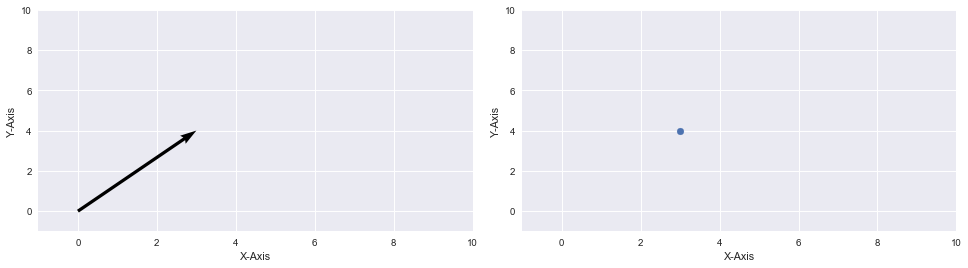

In [46]:
import matplotlib.gridspec as gridspec
N = 2 # <-- Nanti harus diatur disesuaikan dengan banyaknya topic K
cols = 2
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols, width_ratios=[4, 4])

vec = np.array([[0, 0, B, A]])
X, Y, U, V = zip(*vec)

plt.figure(figsize=(14,4), dpi=70)
for k in range(N):
    plt.subplot(gs[k])
    
    if k == 0:
        ax = plt.gca()
        ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
        ax.set_xlim([-1, 10])
        ax.set_ylim([-1, 10])
    else:
        plt.scatter(B, A)
        plt.xlim([-1, 10])
        plt.ylim([-1, 10])

    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")
    
plt.tight_layout()
plt.show()

Diatas adalah contoh plot vector (3,4), jika kita bayangkan kita plot word_term vector (205, 1), sertinya kurang masuk akal, karena kita mengetahui bahwa 205 adalah index yang tidak lain adalah notasi pengganti dari word_term 'ini'.

Direction:

> The direction of a vector is the measure of the angle it makes with a horizontal line. or the direction of a vector is often expressed as an angle of rotation of the vector about its "tail" from east, west, north, or south. ~physicsclassroom.com~

<img src="img/vect-direction.gif",width=350,height=150, longdesc="http://www.physicsclassroom.com/class/vectors/Lesson-1/Vectors-and-Direction", align='middle'>

If you’re given the components of a vector, such as (3, 4), you can convert it easily to the magnitude/angle way of expressing vectors using trigonometry.

<img src="img/vect-angles.png",width=650,height=200, align='middle'>

We can solve theta by using Law of Cosine, sure this is not the only way to solve it, however this is the formula:

$$ { c }^{ 2 }={ a }^{ 2 }+{ b }^{ 2 }-2ab\quad \cos { \Theta  } $$

> Law of Cosines works well for solving triangles when we have two known sides and an angle, but the angle is not between the two sides. ~dummies.com~

where **c** is alwas the opposite of the angle, and the **a** and **b** one of them is *adjacent* and *hypotenuse*.

to calculate hypotenuse

$$ c\quad =\quad \sqrt { { x }^{ 2 }+{ y }^{ 2 } } $$

> Magnitude pada suatu vector yang tidak lain merupakan **length of vector** itu sendiri, is equal to the **hypotenuse** of the triangle so you can use the Pythagorean theorem to calculate it.

In [64]:
from math import acos, degrees, pi, atan

magnitude = math.sqrt((A**2) + (B**2))
magnitude

5.0

In [36]:
%timeit math.sqrt(math.pow(7,2) + math.pow(4,2))
%timeit math.sqrt((7**2) + (4**2))

The slowest run took 12.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 678 ns per loop
The slowest run took 14.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 138 ns per loop


In our case, we knew the coordinate of vector, hence we have the horizontal and vertical components of a vector then We can find the angle by using tangent.

vertical line is the **opposite** and the side is **adjacent**(horizontal), since the tangent is opposite over adjacent, and so:

$$ \frac { 4 }{ 3 } =\tan { (\theta ) } $$

thus the inverse of tangent will be:

$$ \theta \quad =\quad { tan }^{ -1 }(\frac { 4 }{ 3 } ) $$

In [63]:
# math.atan returned in radian
%timeit math.degrees(math.atan(4./3.))
%timeit math.degrees(np.arctan(4./3.)) #tan-1(y/x)
angle=math.degrees(math.atan(4./3.))
print angle

The slowest run took 18.03 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 296 ns per loop
The slowest run took 243.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.61 µs per loop
53.1301023542


* * *
#### Matrix
<img src="img/matrix-1.gif",width=350,height=150, longdesc="https://www.mathworks.com/help/matlab/math/multidimensional-arrays.html", align='middle'>

The numbers of **rows** and **columns** of a matrix are called its **dimensions**, then we can use **Cartesian Coordinate** to project 2-Dimensional matrix above.

it's an example of coordinate system(which is polar coordinate), and Coordinates systems are often used to specify the position of a point, but they may also be used to specify the position of more complex figures such as lines, planes, circles or spheres.

> In geometry, a coordinate system is a system which uses one or more numbers, or coordinates, to uniquely determine the position of a point or other geometric element on a manifold such as Euclidean space ~Wikipedia~

<img src="img/cartesian-quadrant.gif",width=400,height=150>

lalu ketika kita membicarakan matrix yang memiliki row dan column berarti kita berbicara mengenai 2-Dimensional *with m x n dimensions* matrix(tidak peduli seberapa banyak Row dan Column yang dimiliki).

yang membuat segalanya menjadi indah adalah matrix juga mengizinkan kita, untuk memiliki lebih dari 2 Dimensional, yang kemudian disebut **Multidimensional Matrix**.

<img src="img/matrix-2.gif",width=550,height=250, alt="https://www.mathworks.com/help/matlab/math/multidimensional-arrays.html">

In [87]:
## Sample Multidimensional matrix
a = np.arange(48, dtype=np.int64).reshape((3, 4, 4))
print a.shape
print a

(3L, 4L, 4L)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]

 [[32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]]]


In [39]:
# tfm which pandas dataframe object, we named it 2-Dimensional array
print tfm.as_matrix()
print "\n`m x n` Matrix Dimensions:\nRows: %d\nColumns: %d"%(tfm.as_matrix().shape[0],tfm.as_matrix().shape[1])

[[1L 'lho.']
 [1L 'menabung.']
 [1L 'sambung']
 ..., 
 [1L 'Marquez,']
 [2L 'Marquez.']
 [1L 'sini']]

`m x n` Matrix Dimensions:
Rows: 1178
Columns: 2
